# 手寫阿拉伯數字辨識 完整版

## 步驟 1 : 載入 MNIST 手寫阿拉伯數字資料

In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

# 載入 training dataset and test dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 訓練/測試資料的 x/y 維度
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


### 簡單EDA

- 訓練資料前 10 筆圖片的數字

In [2]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

- 顯示第 1 張圖片內含值

In [6]:
print(x_train[0].shape)
print(x_train[0].shape[0])
print(x_train[0])

(28, 28)
28
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 25

- 將非 0 的數字轉為 1, 顯示第 1 張圖片
- 再將轉換後二維內容顯示出來, 隱約可以看出數字為 5

In [7]:
data = x_train[0].copy()
data[data>0] = 1

text_image = []
for i in range(data.shape[0]):
    text_image.append("".join(data[i].astype(str)))

text_image

['0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000001111111111110000',
 '0000000011111111111111110000',
 '0000000111111111111111100000',
 '0000000111111111110000000000',
 '0000000011111110110000000000',
 '0000000001111100000000000000',
 '0000000000011110000000000000',
 '0000000000011110000000000000',
 '0000000000001111110000000000',
 '0000000000000111111000000000',
 '0000000000000011111100000000',
 '0000000000000001111100000000',
 '0000000000000000011110000000',
 '0000000000000011111110000000',
 '0000000000001111111100000000',
 '0000000000111111111000000000',
 '0000000011111111110000000000',
 '0000001111111111000000000000',
 '0000111111111100000000000000',
 '0000111111110000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000']

### 同樣的方法, 顯示第 2 張圖片

In [9]:
data = x_train[1].copy()
data[data > 0] = 1

text_image = []
for i in range(data.shape[0]):
    text_image.append("".join(data[i].astype(str)))

text_image

['0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000001111100000000',
 '0000000000000011111100000000',
 '0000000000000111111111000000',
 '0000000000011111111111000000',
 '0000000000011111111111000000',
 '0000000000111111111111000000',
 '0000000001111111110011100000',
 '0000000011111100000011100000',
 '0000000111111100000011100000',
 '0000000111100000000011100000',
 '0000000111000000000011100000',
 '0000001111000000000011100000',
 '0000001111000000001111100000',
 '0000001110000000011111000000',
 '0000001110000000111100000000',
 '0000001110000001111000000000',
 '0000001111111111111000000000',
 '0000001111111111100000000000',
 '0000001111111110000000000000',
 '0000000111111100000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000']

### 顯示第 1 張圖片圖像

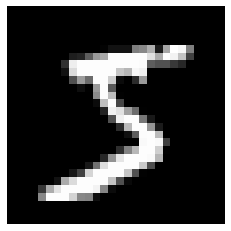

In [10]:
import matplotlib.pyplot as plt

# 第一筆資料
X2 = x_train[0, :, :]

# 繪製點陣圖
plt.imshow(X2.reshape(28, 28), cmap = "gray")

# 隱藏刻度
plt.axis("off")

# 顯示圖形
plt.show()

### 同樣方法, 畫出第 2 張圖片

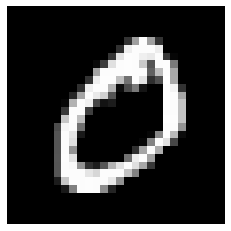

In [11]:
import matplotlib.pyplot as plt

# 第一筆資料
X2 = x_train[1,:,:]

# 繪製點陣圖, cmap = "gray", 灰階
plt.imshow(X2.reshape(28, 28), cmap = "gray")

# 隱藏刻度
plt.axis("off")

# 顯示圖形
plt.show()


### 一次看 10 個數字
- Grey 會讓背景變白色, 數字變黑色

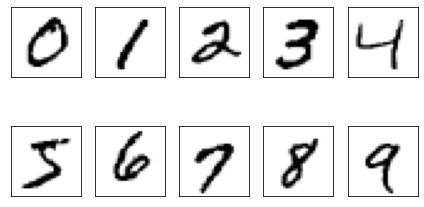

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows = 2, ncols = 5, sharex = True, sharey = True)
ax = ax.flatten()
for i in range(10):
    img = x_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap = "Greys")

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

### 數字 9, 連看 10 張

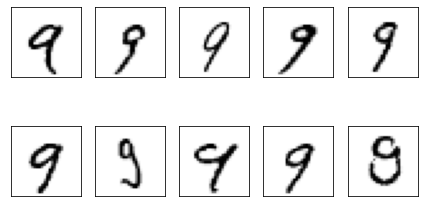

In [15]:
import matplotlib.pyplot as plt

no = 9
fig, ax = plt.subplots(nrows = 2, ncols = 5, sharex = True, sharey = True)
ax = ax.flatten()
for i in range(10):
    img = x_train[y_train == no][i].reshape(28, 28)
    ax[i].imshow(img, cmap = "Greys")

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

## 步驟 2 : 資料清理, 此步驟無需進行

## 步驟 3 : 進行特徵工程, 將特徵縮放成 (0, 1) 之間

- 最後一行加分號, 就可以不要有輸出

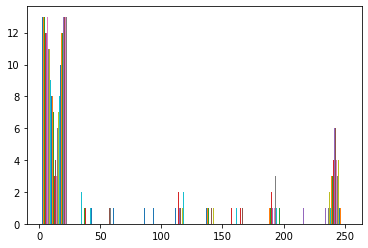

In [18]:
center_point = x_train[:13, 13]
plt.hist(center_point);

In [19]:
x_train_norm, x_test_norm = x_train /255.0, x_test / 255.0
x_train_norm[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## 步驟 4 : 資料分割, 此步驟無需進行, 載入 MNIST 資料時, 已經切割好了

## 步驟 5 : 建立模型結構

In [20]:
# 建立模型
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation = "softmax")
])

- 因為有 sparse, 所以 y 不用轉換

## 設定優化器(optimizer), 損失函數(loss), 績效衡量指標(metrics)的類別

In [21]:
model.compile(optimizer = "adam",
                loss = "sparse_categorical_crossentropy",
                metrics = ["accuracy"])

## 步驟 6 : 結合訓練資料及模型, 進行模型訓練

In [22]:
history = model.fit(x_train_norm, y_train, epochs = 5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3268 - accuracy: 0.9053 - val_loss: 0.1567 - val_accuracy: 0.9570
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1593 - accuracy: 0.9532 - val_loss: 0.1171 - val_accuracy: 0.9669
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1185 - accuracy: 0.9646 - val_loss: 0.1002 - val_accuracy: 0.9705
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0970 - accuracy: 0.9710 - val_loss: 0.0939 - val_accuracy: 0.9701
Epoch 5/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0811 - accuracy: 0.9749 - val_loss: 0.0940 - val_accuracy: 0.9726


In [23]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

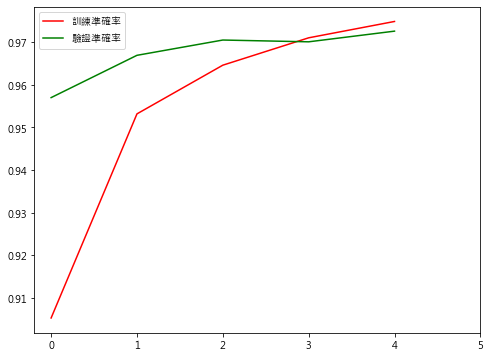

In [26]:
# 對訓練過程的準確率繪圖
from matplotlib.font_manager import FontProperties
plt.rcParams["font.sans-serif"] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize = (8, 6))
plt.plot(history.history["accuracy"], "r", label = "訓練準確率")
plt.plot(history.history["val_accuracy"], "g", label = "驗證準確率")
plt.xticks(range(0,6))
plt.legend()

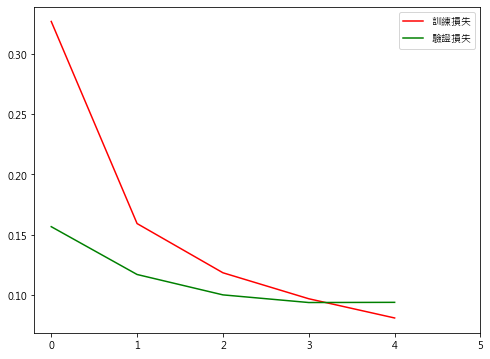

In [27]:
# 對訓練過程的損失繪圖
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 6))
plt.plot(history.history["loss"], "r", label = "訓練損失")
plt.plot(history.history["val_loss"], "g", label = "驗證損失")
plt.xticks(range(0, 6))
plt.legend()

## 步驟 7 : 評分(Score Model)

In [28]:
score = model.evaluate(x_test_norm, y_test, verbose = 2)

for i, x in enumerate(score):
    print(f"{model.metrics_names[i]}: {score[i]:.4f}")

313/313 - 0s - loss: 0.0835 - accuracy: 0.9726 - 447ms/epoch - 1ms/step
loss: 0.0835
accuracy: 0.9726


- 預測 20 筆資料

In [29]:
import numpy as np

predictions = np.argmax(model.predict(x_test_norm), axis = -1)

# 比對
print("actual    :", y_test[0:20])
print("prediction:", predictions[0:20])

313/313 [==============================] - 0s 1ms/step
actual    : [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
prediction: [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]


- 顯示第 9 筆的機率

In [30]:
import numpy as np

predictions = model.predict(x_test_norm[8:9])
print(f"0~9 預測機率: {np.around(predictions, 2)}")

1/1 [==============================] - 0s 19ms/step
0~9 預測機率: [[0.   0.   0.   0.   0.   0.16 0.83 0.   0.   0.  ]]


- 顯示第 9 筆圖像

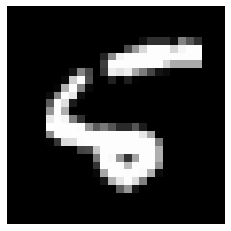

In [31]:
X2 = x_test[8, :, :]
plt.imshow(X2.reshape(28, 28), cmap = "gray")
plt.axis("off")
plt.show()

## 步驟 8 : 評估, 暫不進行

## 步驟 9 : 模型佈署

In [32]:
#  模型存檔
model.save("model.h5")

# 模型載入
model = tf.keras.models.load_model("model.h5")

## 步驟 10 : 新資料預測

In [33]:
# 使用小畫家, 繪製 0~9 , 實際測試看看
from skimage import io
from skimage.transform import resize
import numpy as np

# 讀取影像並轉為單色
uploaded_file = "./myDigits/9.png"
image1 = io.imread(uploaded_file, as_gray = True)
print(image1.shape)

# 縮為 (28, 28) 大小的影像
image_resized = resize(image1, (28, 28), anti_aliasing=True)
X1 = image_resized.reshape(1, 28, 28)

# 反轉顏色
X1 = np.abs(1-X1)

# 預測
predictions = np.argmax(model.predict(X1), axis = -1)
print(predictions)

(280, 280)
1/1 [==============================] - 0s 33ms/step
[2]


In [34]:
model.predict(X1)

1/1 [==============================] - 0s 13ms/step


array([[1.2562658e-03, 5.0769474e-02, 5.7646632e-01, 1.3670903e-01,
        1.0417055e-04, 7.3102675e-03, 3.7215345e-03, 4.5855721e-03,
        2.1865991e-01, 4.1745065e-04]], dtype=float32)

In [37]:
# 讀取影像並轉為單色
for i in range(10):
    # uploaded_file = f'./MyDigits/{i}.png'
    uploaded_file = f'./myDigits/{i}.png'
    image1 = io.imread(uploaded_file, as_gray=True)

    # 縮為 (28, 28) 大小的影像
    image_resized = resize(image1, (28, 28), anti_aliasing=True)    
    X1 = image_resized.reshape(1,28, 28) #/ 255

    # 反轉顏色，顏色0為白色，與 RGB 色碼不同，它的 0 為黑色
    X1 = np.abs(1-X1)

    # 預測
    #predictions = model.predict_classes(X1)
    predictions = np.argmax(model.predict(X1), axis=-1)
    print(predictions)

1/1 [==============================] - 0s 13ms/step
[0]
1/1 [==============================] - 0s 13ms/step
[1]
1/1 [==============================] - 0s 20ms/step
[2]
1/1 [==============================] - 0s 14ms/step
[3]
1/1 [==============================] - 0s 14ms/step
[4]
1/1 [==============================] - 0s 14ms/step
[5]
1/1 [==============================] - 0s 13ms/step
[6]
1/1 [==============================] - 0s 13ms/step
[7]
1/1 [==============================] - 0s 14ms/step
[8]
1/1 [==============================] - 0s 13ms/step
[2]


## 其他

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## 繪製模型

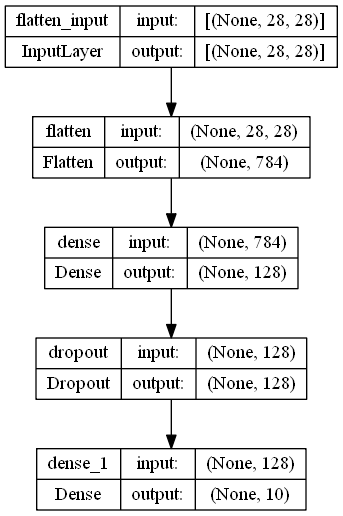

In [39]:
tf.keras.utils.plot_model(model, to_file = "model.png", show_shapes = True)

## 混淆矩陣 (1)

In [41]:
import pandas as pd

predictions = np.argmax(model.predict(x_test_norm), axis = -1)
pd.crosstab(y_test, predictions, rownames = ["實際值"], colnames = ["預測值"])

313/313 [==============================] - 0s 737us/step


預測值,0,1,2,3,4,5,6,7,8,9
實際值,,,,,,,,,,
0,971,0,2,1,1,0,2,1,2,0
1,0,1125,4,0,0,0,2,0,4,0
2,5,1,1013,1,1,0,2,3,6,0
3,0,0,11,982,0,7,0,4,2,4
4,1,0,5,0,960,0,5,0,2,9
5,3,1,0,15,1,855,7,0,6,4
6,5,3,2,1,3,4,939,0,1,0
7,3,11,19,6,2,0,0,965,4,18
8,4,0,5,8,1,6,7,2,938,3


## 混淆矩陣 (2)

In [42]:
import sklearn.metrics

sklearn.metrics.confusion_matrix(y_true = y_test, y_pred = np.argmax(model.predict(x_test_norm), axis = -1))

313/313 [==============================] - 0s 985us/step


array([[ 971,    0,    2,    1,    1,    0,    2,    1,    2,    0],
       [   0, 1125,    4,    0,    0,    0,    2,    0,    4,    0],
       [   5,    1, 1013,    1,    1,    0,    2,    3,    6,    0],
       [   0,    0,   11,  982,    0,    7,    0,    4,    2,    4],
       [   1,    0,    5,    0,  960,    0,    5,    0,    2,    9],
       [   3,    1,    0,   15,    1,  855,    7,    0,    6,    4],
       [   5,    3,    2,    1,    3,    4,  939,    0,    1,    0],
       [   3,   11,   19,    6,    2,    0,    0,  965,    4,   18],
       [   4,    0,    5,    8,    1,    6,    7,    2,  938,    3],
       [   5,    6,    0,   10,    4,    1,    2,    2,    1,  978]],
      dtype=int64)

In [44]:
model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'flatten_input'}},
  {'class_name': 'Flatten',
   'config': {'name': 'flatten',
    'trainable': True,
    'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'data_format': 'channels_last'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'units': 128,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout',
    'trainable': True,
    'dtype': 'float32',
    'rate': 

In [45]:
model.get_weights()

[array([[ 0.03818966,  0.04082489,  0.01270115, ..., -0.01149182,
         -0.04093746, -0.0808235 ],
        [-0.02764545,  0.05185074,  0.06303019, ..., -0.05211834,
          0.02954374,  0.04832486],
        [ 0.00275515,  0.04008072, -0.0628492 , ..., -0.00780305,
          0.05791252,  0.04176375],
        ...,
        [ 0.05383294,  0.03214441, -0.07334835, ..., -0.03273166,
          0.04395442,  0.07585218],
        [-0.03806422, -0.04825977,  0.02749678, ..., -0.01104569,
         -0.00198991, -0.04753321],
        [-0.00093692,  0.06081531,  0.06679053, ..., -0.02693577,
         -0.02072188, -0.04265706]], dtype=float32),
 array([-0.04533647,  0.09410645,  0.14210278,  0.03006318,  0.17103745,
        -0.00758238, -0.01562975, -0.09441541,  0.16804874,  0.12248987,
         0.18185939, -0.19649473,  0.01813116,  0.02579289,  0.04232863,
        -0.10695297, -0.1140603 , -0.01741358,  0.08499175,  0.17296459,
         0.01247097,  0.00412872,  0.11776392, -0.04878243,  0.149

In [47]:
model.get_layer(index=1).name

'dense'

In [48]:
model.get_layer(index=1).get_weights()

[array([[ 0.03818966,  0.04082489,  0.01270115, ..., -0.01149182,
         -0.04093746, -0.0808235 ],
        [-0.02764545,  0.05185074,  0.06303019, ..., -0.05211834,
          0.02954374,  0.04832486],
        [ 0.00275515,  0.04008072, -0.0628492 , ..., -0.00780305,
          0.05791252,  0.04176375],
        ...,
        [ 0.05383294,  0.03214441, -0.07334835, ..., -0.03273166,
          0.04395442,  0.07585218],
        [-0.03806422, -0.04825977,  0.02749678, ..., -0.01104569,
         -0.00198991, -0.04753321],
        [-0.00093692,  0.06081531,  0.06679053, ..., -0.02693577,
         -0.02072188, -0.04265706]], dtype=float32),
 array([-0.04533647,  0.09410645,  0.14210278,  0.03006318,  0.17103745,
        -0.00758238, -0.01562975, -0.09441541,  0.16804874,  0.12248987,
         0.18185939, -0.19649473,  0.01813116,  0.02579289,  0.04232863,
        -0.10695297, -0.1140603 , -0.01741358,  0.08499175,  0.17296459,
         0.01247097,  0.00412872,  0.11776392, -0.04878243,  0.149

In [49]:
model.count_params()

101770